In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
# import the csv files using pandas
cervical_cancer_df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Cervical cancer prediction/cervical_cancer.csv")
# (int) Age
# (int) Number of sexual partners
#  (int) First sexual intercourse (age)
# (int) Num of pregnancies
# (bool) Smokes
# (bool) Smokes (years)
# (bool) Smokes (packs/year)
# (bool) Hormonal Contraceptives
# (int) Hormonal Contraceptives (years)
# (bool) IUD ("IUD" stands for "intrauterine device" and used for birth control
# (int) IUD (years)
# (bool) STDs (Sexually transmitted disease)
# (int) STDs (number)
# (bool) STDs:condylomatosis
# (bool) STDs:cervical condylomatosis
# (bool) STDs:vaginal condylomatosis
# (bool) STDs:vulvo-perineal condylomatosis
# (bool) STDs:syphilis
# (bool) STDs:pelvic inflammatory disease
# (bool) STDs:genital herpes
# (bool) STDs:molluscum contagiosum
# (bool) STDs:AIDS
# (bool) STDs:HIV
# (bool) STDs:Hepatitis B
# (bool) STDs:HPV
# (int) STDs: Number of diagnosis
# (int) STDs: Time since first diagnosis
# (int) STDs: Time since last diagnosis
# (bool) Dx:Cancer
# (bool) Dx:CIN
# (bool) Dx:HPV
# (bool) Dx
# (bool) Hinselmann:  A colposcopy is a procedure in which doctors examine the cervix.
# (bool) Schiller:  Schiller's Iodine test is used for cervical cancer diagnosis
# (bool) Cytology:  Cytology is the exam of a single cell type used for cancer screening.
# (bool) Biopsy: target variable - Biopsy is performed by removing a piece of tissue and examine it under microscope,
# Biopsy is the main way doctors diagnose most types of cancer.

In [ ]:
# Let's explore the dataframe
cervical_cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [4]:
cervical_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [ ]:
# Get the statistics of the data frame
cervical_cancer_df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Notice many question marks indicating missing value

In [32]:
# replace '?' with NaN
cervical_cancer_df=cervical_cancer_df.replace('?',np.nan) #so that isnull(), heatmapcan be used

In [ ]:
cervical_cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [ ]:
cervical_cancer_df.isnull().sum()  #number of missing values

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

<Axes: >

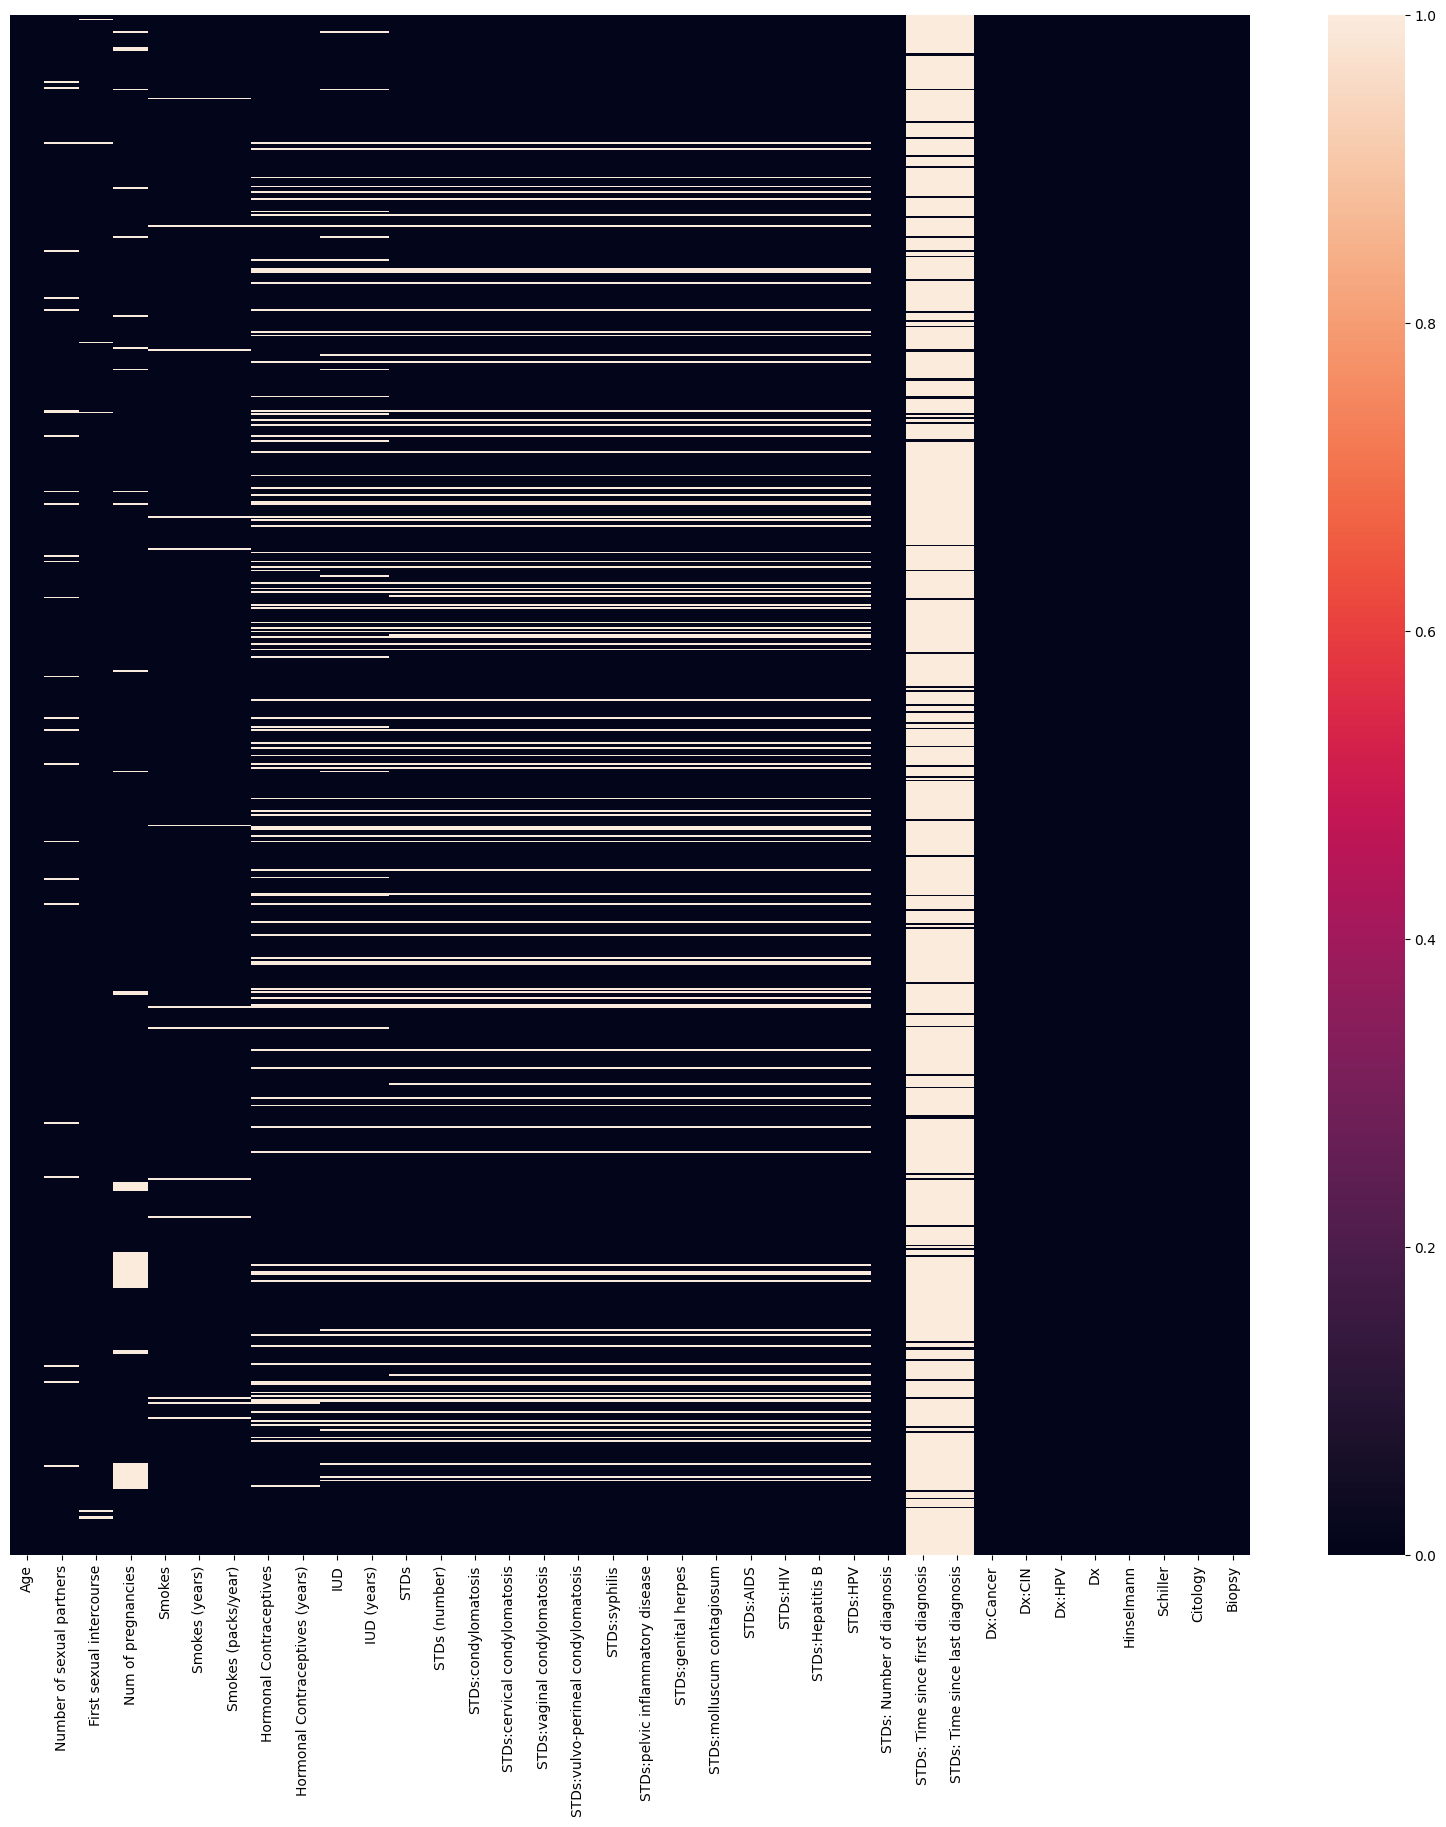

In [ ]:
# Plot heatmap
plt.figure(figsize=(20,20))
sns.heatmap(cervical_cancer_df.isnull(), yticklabels=False)

In [ ]:
# Get data frame info
cervical_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

In [33]:
# Since STDs: Time since first diagnosis  and STDs: Time since last diagnosis have more than 80% missing values
# we can drop them
cervical_cancer_df=cervical_cancer_df.drop(columns=['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'])
cervical_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

In [34]:
# Since most of the column types are object, we are not able to get the statistics of the dataframe.
# Convert them to numeric type

cervical_cancer_df = cervical_cancer_df.apply(pd.to_numeric)
cervical_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [ ]:
# Get the statistics of the dataframe
cervical_cancer_df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,753.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,0.002656,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,0.051503,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Number of sexual partners'}>,
        <Axes: title={'center': 'First sexual intercourse'}>,
        <Axes: title={'center': 'Num of pregnancies'}>,
        <Axes: title={'center': 'Smokes'}>,
        <Axes: title={'center': 'Smokes (years)'}>],
       [<Axes: title={'center': 'Smokes (packs/year)'}>,
        <Axes: title={'center': 'Hormonal Contraceptives'}>,
        <Axes: title={'center': 'Hormonal Contraceptives (years)'}>,
        <Axes: title={'center': 'IUD'}>,
        <Axes: title={'center': 'IUD (years)'}>,
        <Axes: title={'center': 'STDs'}>],
       [<Axes: title={'center': 'STDs (number)'}>,
        <Axes: title={'center': 'STDs:condylomatosis'}>,
        <Axes: title={'center': 'STDs:cervical condylomatosis'}>,
        <Axes: title={'center': 'STDs:vaginal condylomatosis'}>,
        <Axes: title={'center': 'STDs:vulvo-perineal condylomatosis'}>,
        <Axes: title={'center': 'STDs:syphilis'}>]

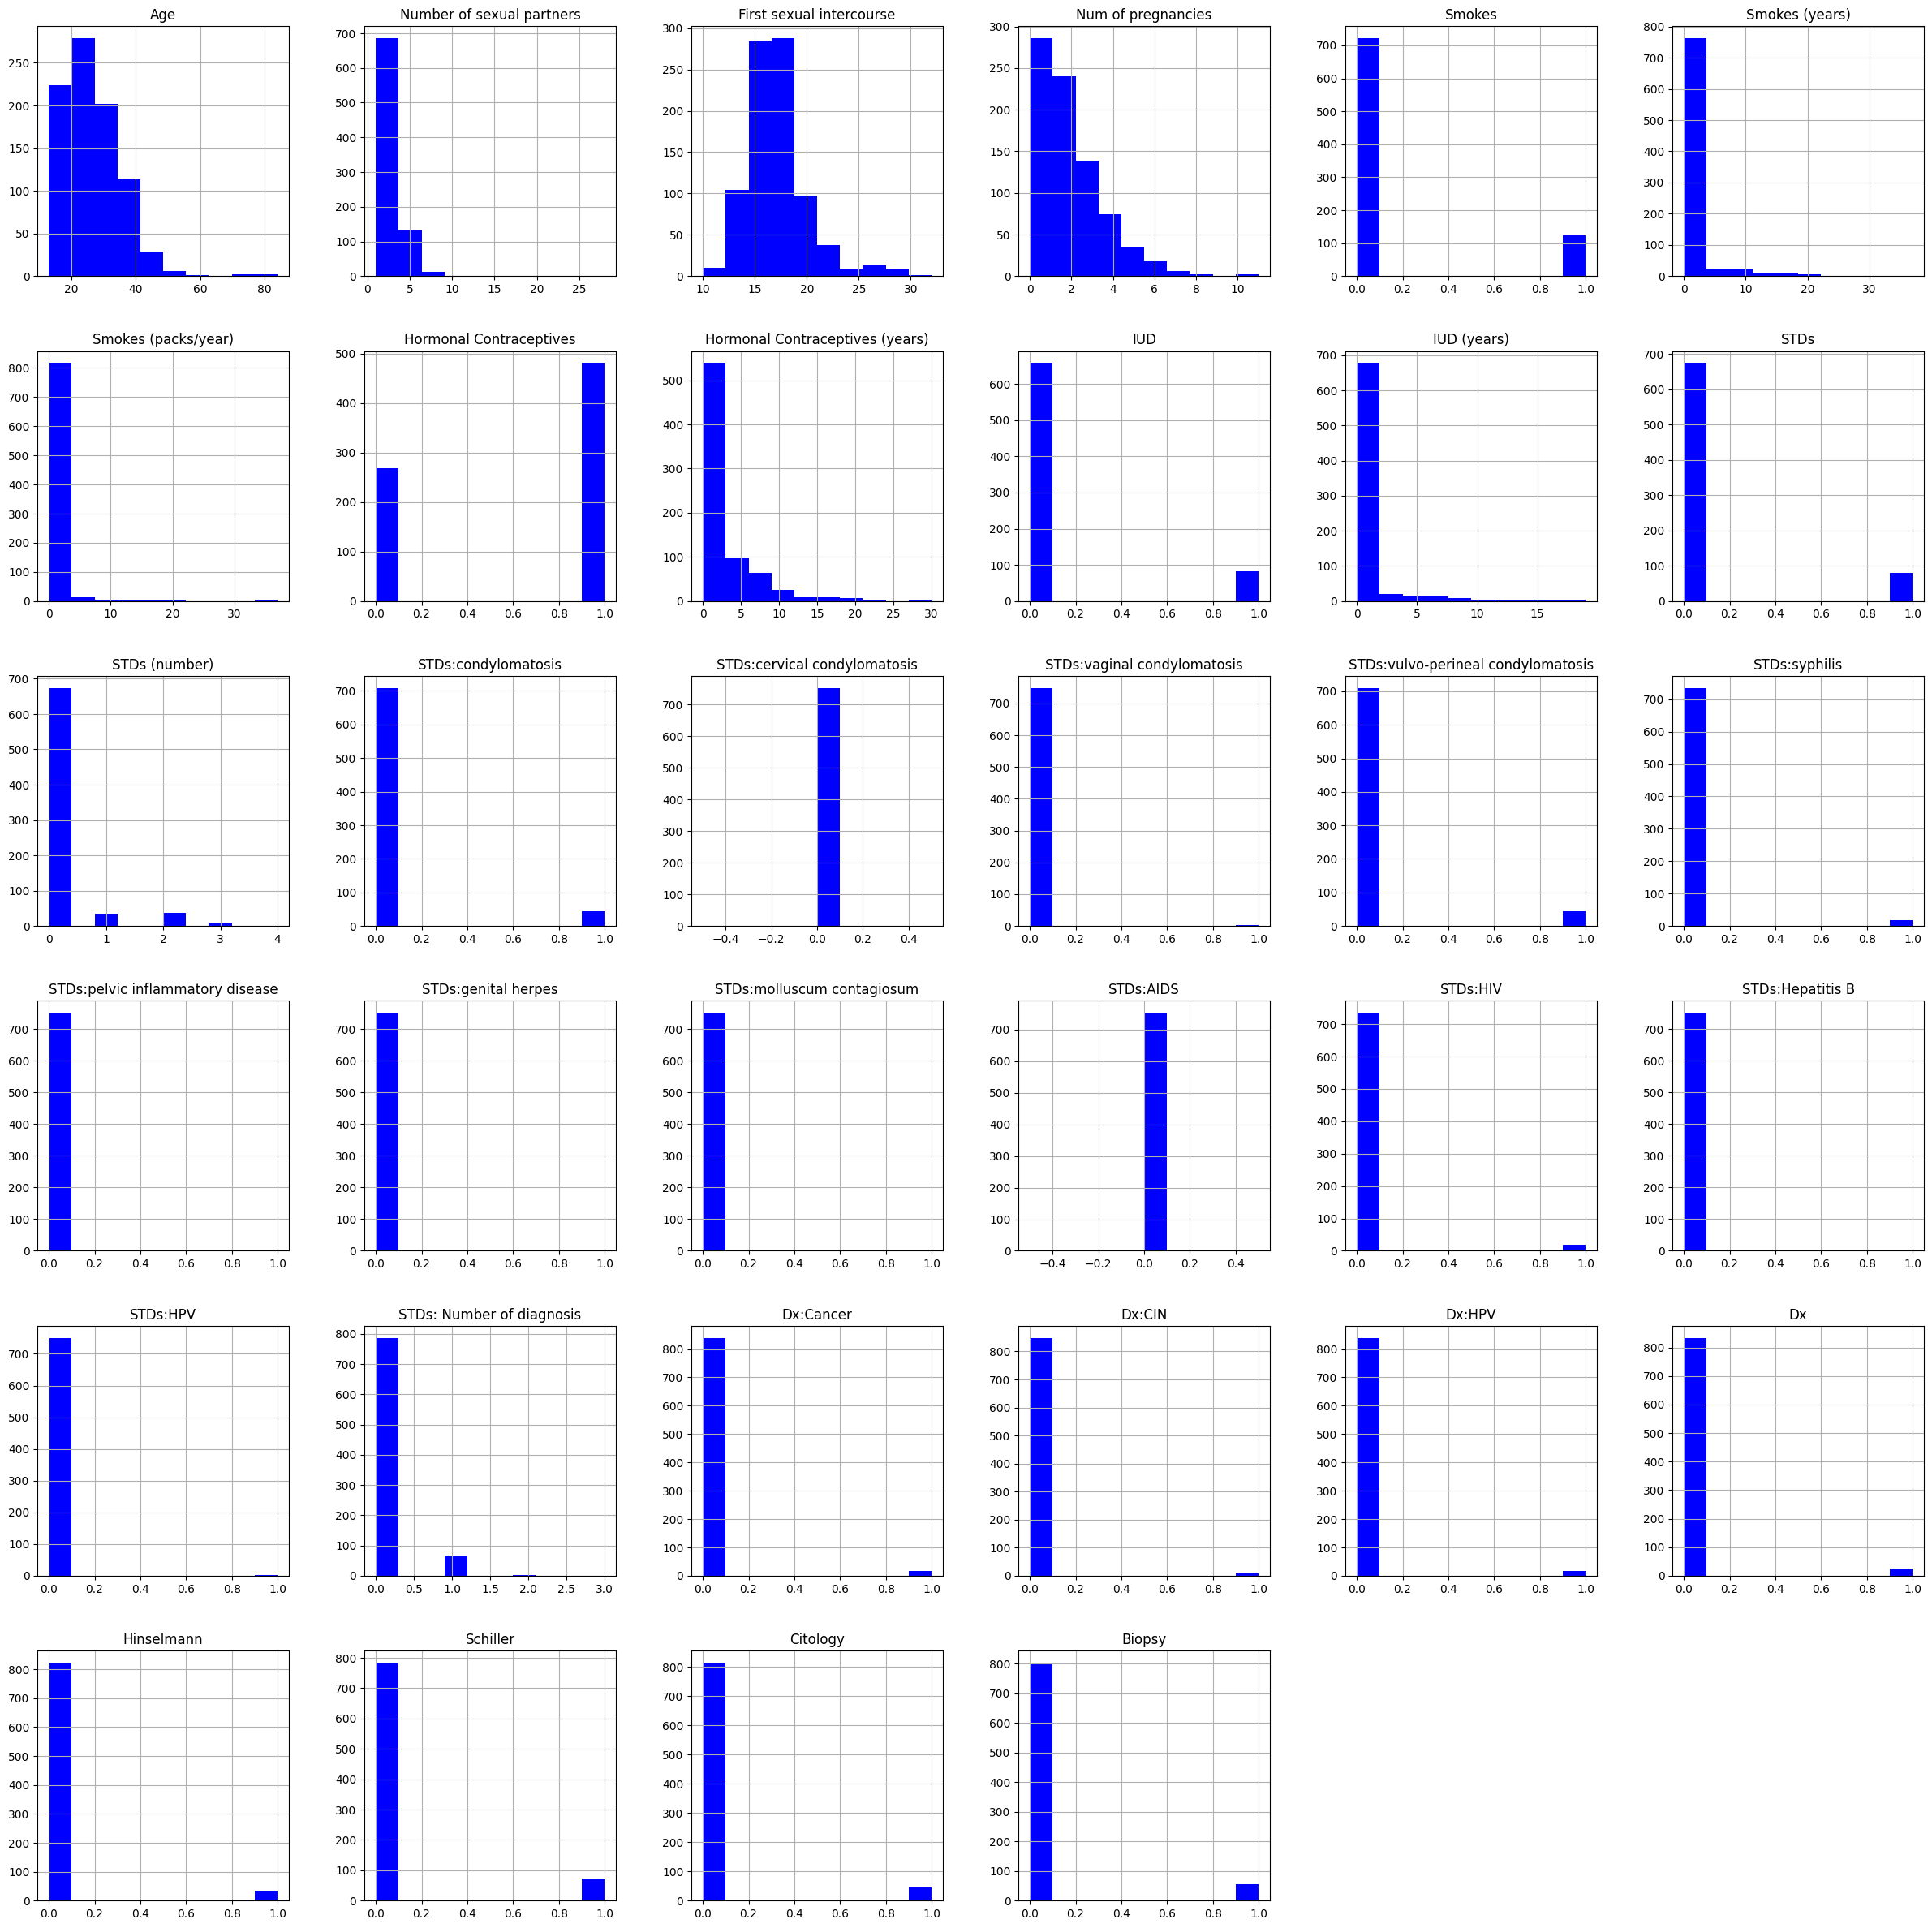

In [ ]:
cervical_cancer_df.hist(bins=10, figsize=(30,30), color='b')

In [10]:
cervical_cancer_df.nunique()

,0
Age,44
Number of sexual partners,12
First sexual intercourse,21
Num of pregnancies,11
Smokes,2
Smokes (years),30
Smokes (packs/year),62
Hormonal Contraceptives,2
Hormonal Contraceptives (years),40
IUD,2


Looks like 6 columns have only 1 value, check frequencies

In [35]:
STD_columns=[col for col in cervical_cancer_df.columns if col.startswith('STD')]
STD_columns

['STDs',
 'STDs (number)',
 'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'STDs: Number of diagnosis']

In [9]:
for col in STD_columns:
    print(cervical_cancer_df[col].value_counts())

STDs
0.0    674
1.0     79
Name: count, dtype: int64
STDs (number)
0.0    674
2.0     37
1.0     34
3.0      7
4.0      1
Name: count, dtype: int64
STDs:condylomatosis
0.0    709
1.0     44
Name: count, dtype: int64
STDs:cervical condylomatosis
0.0    753
Name: count, dtype: int64
STDs:vaginal condylomatosis
0.0    749
1.0      4
Name: count, dtype: int64
STDs:vulvo-perineal condylomatosis
0.0    710
1.0     43
Name: count, dtype: int64
STDs:syphilis
0.0    735
1.0     18
Name: count, dtype: int64
STDs:pelvic inflammatory disease
0.0    752
1.0      1
Name: count, dtype: int64
STDs:genital herpes
0.0    752
1.0      1
Name: count, dtype: int64
STDs:molluscum contagiosum
0.0    752
1.0      1
Name: count, dtype: int64
STDs:AIDS
0.0    753
Name: count, dtype: int64
STDs:HIV
0.0    735
1.0     18
Name: count, dtype: int64
STDs:Hepatitis B
0.0    752
1.0      1
Name: count, dtype: int64
STDs:HPV
0.0    751
1.0      2
Name: count, dtype: int64
STDs: Number of diagnosis
0    787
1     68
2  

Two columns only have value of 0, not providing any information, should be dropped

In [36]:
cervical_cancer_df.drop(columns=['STDs:AIDS','STDs:cervical condylomatosis'], inplace=True)
cervical_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [37]:
STD_columns=[col for col in cervical_cancer_df.columns if col.startswith('STD')]
STD_columns

['STDs',
 'STDs (number)',
 'STDs:condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'STDs: Number of diagnosis']

In [38]:
# Replace null values with 0 (most frequent in the dataset) for STD flags
cervical_cancer_df[STD_columns] = cervical_cancer_df[STD_columns].fillna(0)

In [39]:
# Replace null values with 0 for other dummy variables
cervical_cancer_df['Smokes']=cervical_cancer_df['Smokes'].fillna(0)
cervical_cancer_df['Hormonal Contraceptives']=cervical_cancer_df['Hormonal Contraceptives'].fillna(0)
cervical_cancer_df['IUD']=cervical_cancer_df['IUD'].fillna(0)

In [40]:
# Replace null values with median for continuous variables
cont_col=['Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes (years)','Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)']
cervical_cancer_df[cont_col]=cervical_cancer_df[cont_col].fillna(cervical_cancer_df.median())

In [16]:
cervical_cancer_df.isnull().sum()

,0
Age,0
Number of sexual partners,0
First sexual intercourse,0
Num of pregnancies,0
Smokes,0
Smokes (years),0
Smokes (packs/year),0
Hormonal Contraceptives,0
Hormonal Contraceptives (years),0
IUD,0


<Axes: >

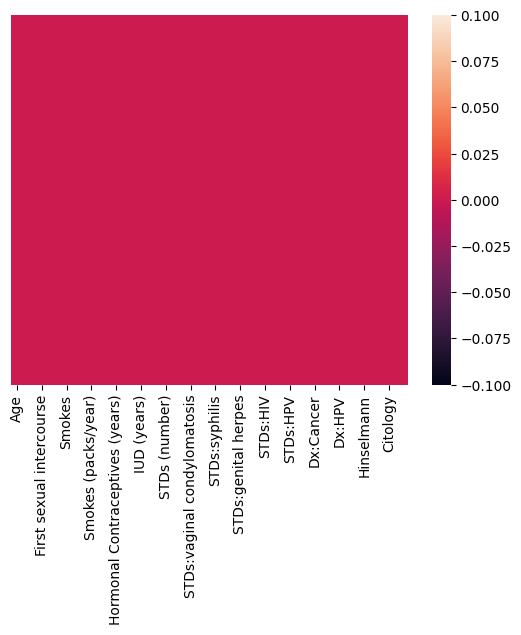

In [ ]:
# Nan heatmap
sns.heatmap(cervical_cancer_df.isnull(), yticklabels=False)

In [ ]:
# Get the correlation matrix
cervical_cancer_df.corr()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.085971,0.369175,0.525892,0.057204,0.218261,0.131861,0.116499,0.295267,0.279429,...,0.040861,-0.001606,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
Number of sexual partners,0.085971,1.000000,-0.145847,0.077439,0.236858,0.175729,0.174968,0.011277,0.021188,0.032460,...,0.014360,0.053056,0.023699,0.016669,0.028646,0.024597,-0.039098,-0.007230,0.024067,-0.000408
First sexual intercourse,0.369175,-0.145847,1.000000,-0.056374,-0.123280,-0.058207,-0.056232,0.061642,0.025071,-0.010758,...,0.034728,-0.013331,0.067281,-0.032628,0.043964,0.035748,-0.016549,0.003489,-0.010974,0.007259
Num of pregnancies,0.525892,0.077439,-0.056374,1.000000,0.081517,0.175832,0.096976,0.161186,0.218805,0.204501,...,-0.026153,0.034912,0.036962,-0.002600,0.048578,0.014227,0.037809,0.085810,-0.027675,0.040215
Smokes,0.057204,0.236858,-0.123280,0.081517,1.000000,0.723572,0.493843,-0.006397,0.041979,-0.055115,...,0.049193,0.090725,-0.013470,-0.042119,0.009737,-0.069396,0.033333,0.052028,-0.004639,0.028724
Smokes (years),0.218261,0.175729,-0.058207,0.175832,0.723572,1.000000,0.724320,-0.000290,0.052006,0.027492,...,0.051201,0.078303,0.052859,-0.030476,0.055398,-0.050213,0.070352,0.093479,-0.007275,0.061204
Smokes (packs/year),0.131861,0.174968,-0.056232,0.096976,0.493843,0.724320,1.000000,0.014806,0.043262,0.008226,...,-0.008015,0.029912,0.107229,-0.020800,0.109118,-0.034270,0.026086,0.017200,0.004250,0.024487
Hormonal Contraceptives,0.116499,0.011277,0.061642,0.161186,-0.006397,-0.000290,0.014806,1.000000,0.469879,0.083174,...,0.042793,-0.023652,0.047668,-0.001048,0.047668,0.007768,0.063855,0.046135,0.014195,0.049535
Hormonal Contraceptives (years),0.295267,0.021188,0.025071,0.218805,0.041979,0.052006,0.043262,0.469879,1.000000,0.110677,...,0.053756,-0.028285,0.062971,0.003793,0.065640,-0.009136,0.051093,0.096702,0.082537,0.094164
IUD,0.279429,0.032460,-0.010758,0.204501,-0.055115,0.027492,0.008226,0.083174,0.110677,1.000000,...,-0.015819,0.035791,0.117166,0.043708,0.062142,0.135778,0.052108,0.096089,0.013292,0.059231


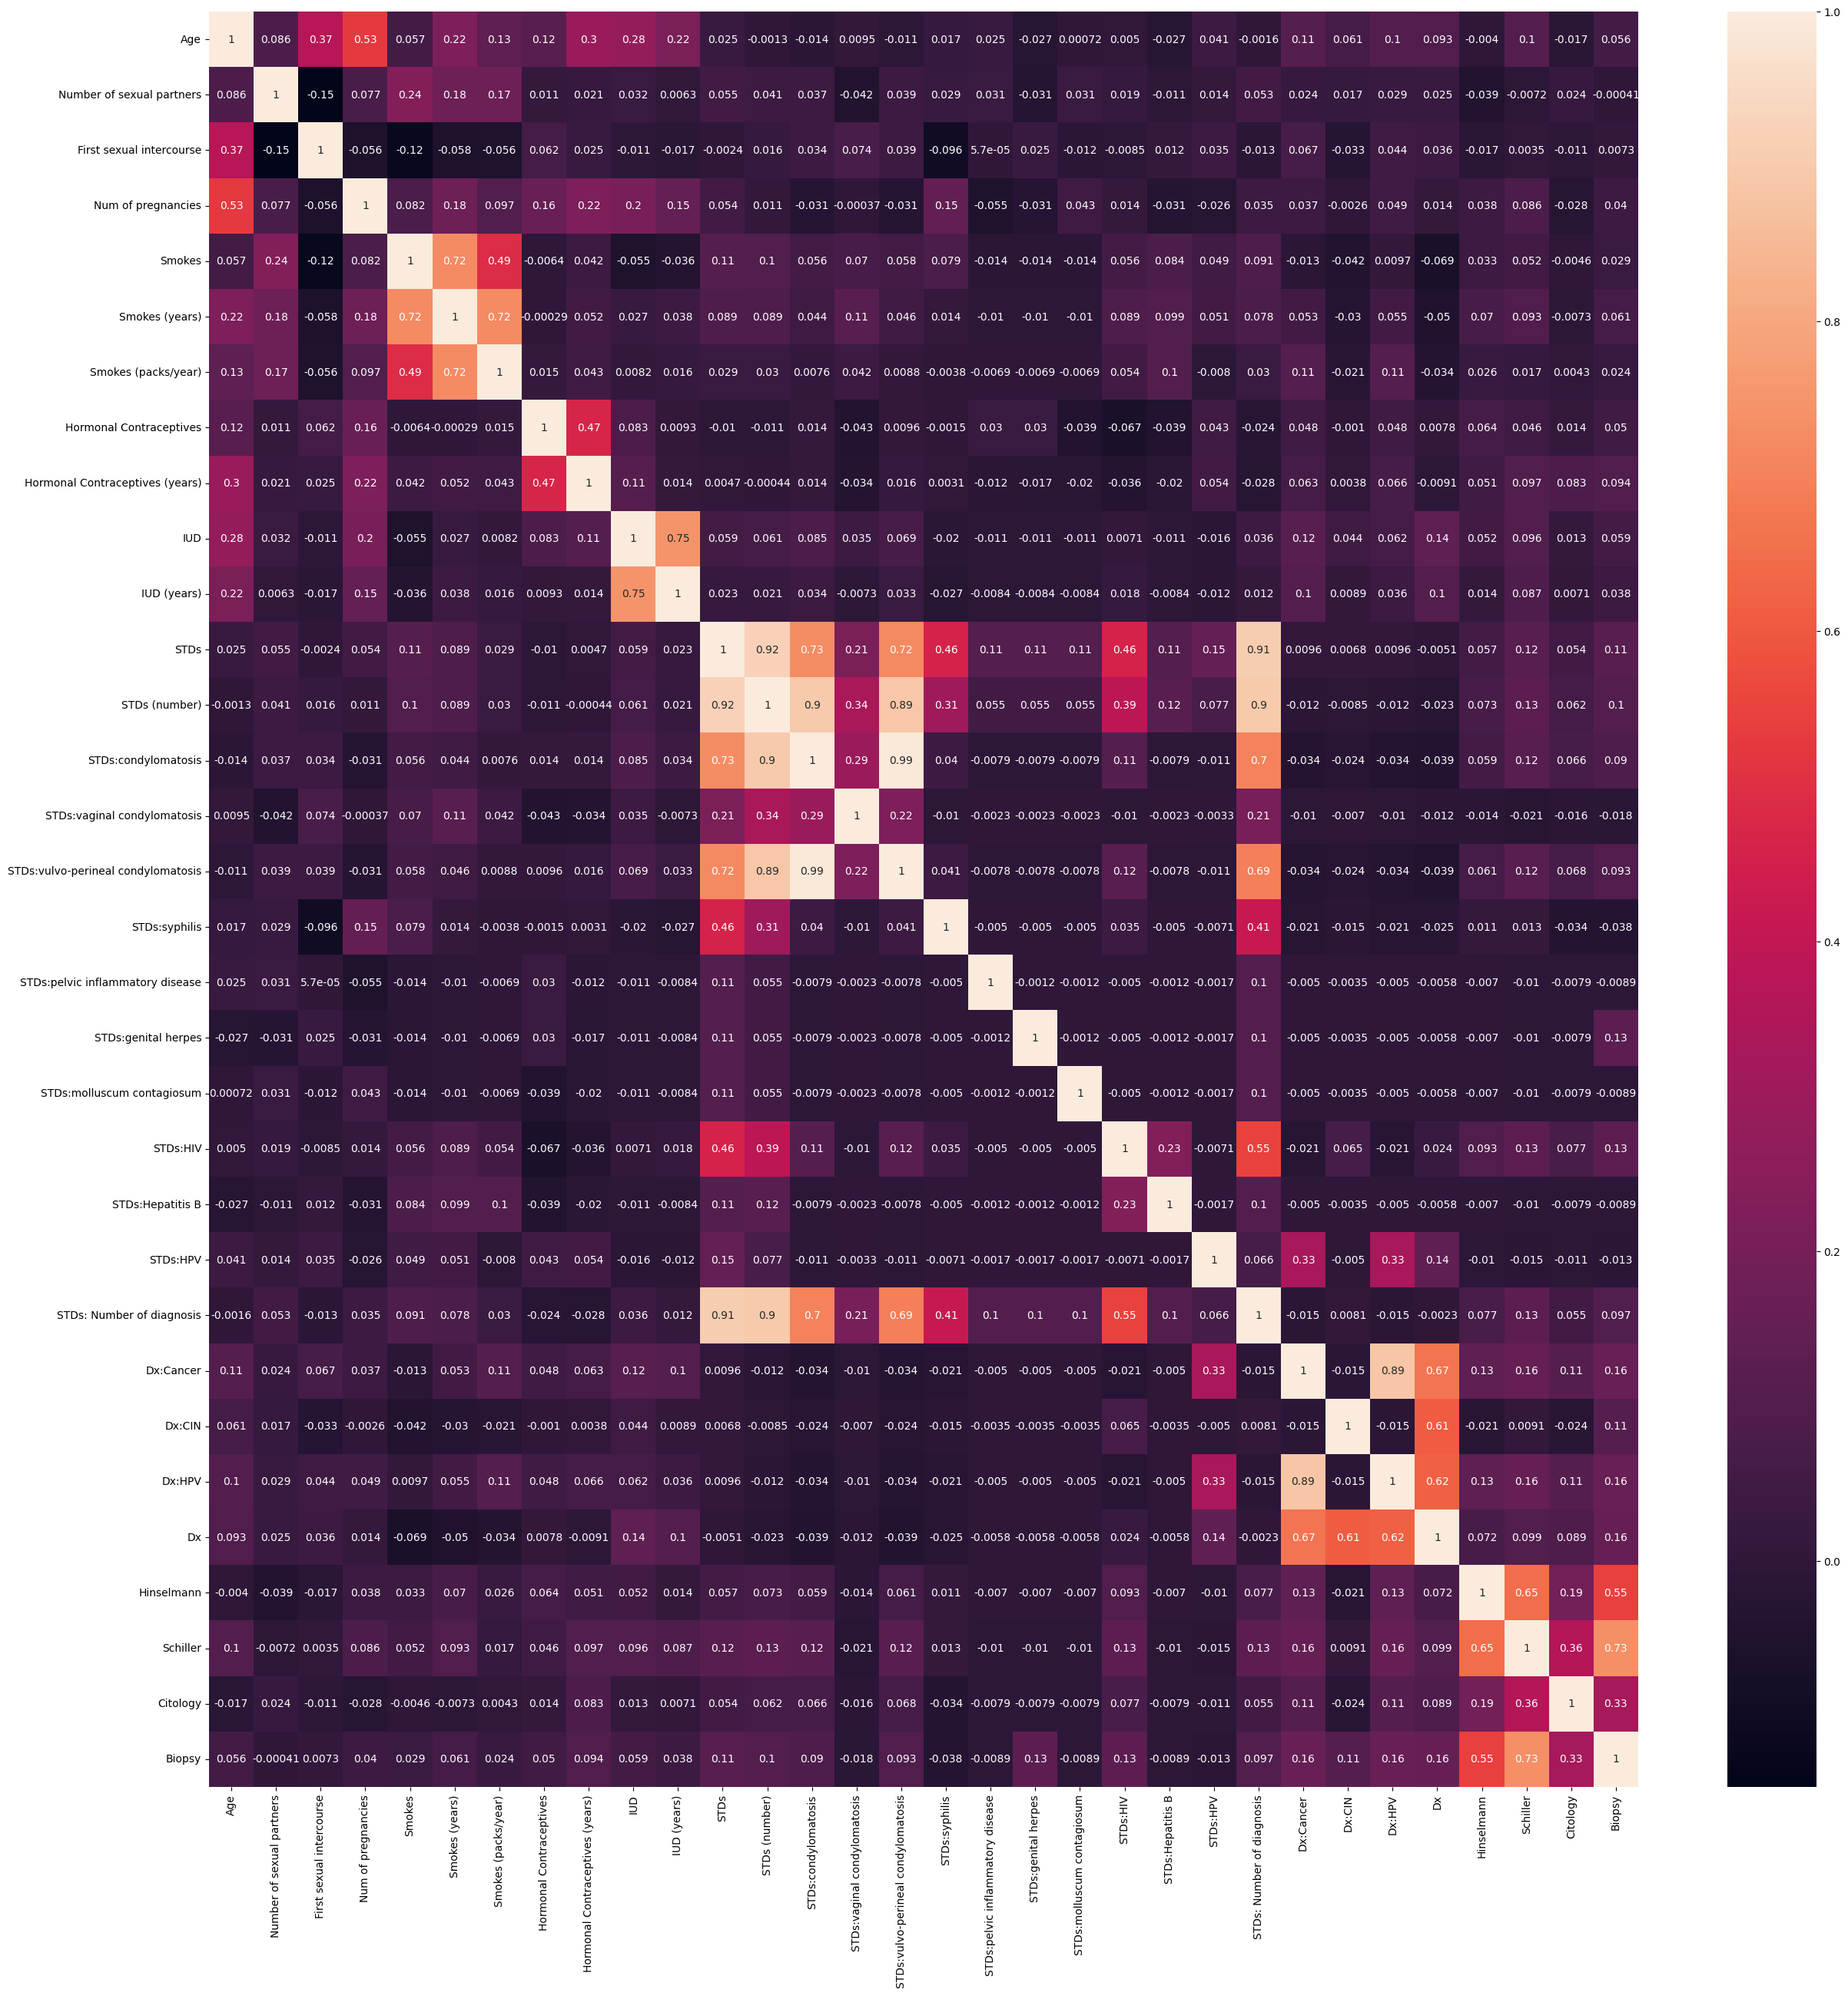

In [ ]:
# Plot the correlation matrix
plt.figure(figsize=(30,30))
sns.heatmap(cervical_cancer_df.corr(), annot=True)
plt.show()

In [15]:
# For tree-based models, correlation is less of an issue, remove one of the variables when correlation>0.9
corr_matrix = cervical_cancer_df.corr()
np.fill_diagonal(corr_matrix.values, 0)
high_corr_mask = np.abs(corr_matrix) > 0.9
high_corr_pairs = corr_matrix[high_corr_mask].stack().reset_index()
high_corr_pairs.columns = ['feature1', 'feature2', 'correlation']
high_corr_pairs

,feature1,feature2,correlation
0,STDs,STDs (number),0.919625
1,STDs,STDs: Number of diagnosis,0.907805
2,STDs (number),STDs,0.919625
3,STDs (number),STDs:condylomatosis,0.900245
4,STDs:condylomatosis,STDs (number),0.900245
5,STDs:condylomatosis,STDs:vulvo-perineal condylomatosis,0.987964
6,STDs:vulvo-perineal condylomatosis,STDs:condylomatosis,0.987964
7,STDs: Number of diagnosis,STDs,0.907805


In [41]:
cervical_cancer_df1=cervical_cancer_df.drop(columns=['STDs (number)','STDs: Number of diagnosis','STDs:vulvo-perineal condylomatosis'])
cervical_cancer_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               858 non-null    int64  
 1   Number of sexual partners         858 non-null    float64
 2   First sexual intercourse          858 non-null    float64
 3   Num of pregnancies                858 non-null    float64
 4   Smokes                            858 non-null    float64
 5   Smokes (years)                    858 non-null    float64
 6   Smokes (packs/year)               858 non-null    float64
 7   Hormonal Contraceptives           858 non-null    float64
 8   Hormonal Contraceptives (years)   858 non-null    float64
 9   IUD                               858 non-null    float64
 10  IUD (years)                       858 non-null    float64
 11  STDs                              858 non-null    float64
 12  STDs:con

In [ ]:
# check new dataframe to see if there is still correlation>0.9
corr_matrix = cervical_cancer_df1.corr()
np.fill_diagonal(corr_matrix.values, 0)
high_corr_mask = np.abs(corr_matrix) > 0.9
high_corr_pairs = corr_matrix[high_corr_mask].stack().reset_index()
high_corr_pairs.columns = ['feature1', 'feature2', 'correlation']
high_corr_pairs

,feature1,feature2,correlation


In [42]:
y=cervical_cancer_df1['Biopsy']
X=cervical_cancer_df1.drop(columns=['Biopsy'])

In [ ]:
type(y)  # Pandas Series

pandas.core.series.Series

In [43]:
y.shape

(858,)

In [44]:
X.shape

(858, 28)

In [19]:
X.nunique()

,0
Age,44
Number of sexual partners,12
First sexual intercourse,21
Num of pregnancies,11
Smokes,2
Smokes (years),30
Smokes (packs/year),62
Hormonal Contraceptives,2
Hormonal Contraceptives (years),40
IUD,2


Check target class balance

In [20]:
y.value_counts()

,count
Biopsy,
0,803
1,55


In [45]:
y.value_counts(normalize=True)

,proportion
Biopsy,
0,0.935897
1,0.064103


positive cases are only 6.4% of total sample size (55/(55+803)=6.4%). If the minority class is less than 20–30%, it’s worth treating as imbalanced. Less than 10% is severely imbalanced. Need to oversample the minority class or undersample the majority class.


In [ ]:
y.mean()  # gives the same result

np.float64(0.0641025641025641)

**use SMOTE to oversample the minority class**

In [46]:
pip install imbalanced-learn

In [47]:
# Get a list of categorical columns with 2 unique values
categorical_cols = [col for col in X.columns if X[col].nunique() == 2]

# Print the list of categorical columns
print(categorical_cols)

['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology']


In [48]:
categorical_indices = [X.columns.get_loc(col) for col in categorical_cols]

In [49]:
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split

# Split before resampling to avoid data leakage, stratify=y ensures that the class distribution in the target variable y is preserved in both the
# training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Apply SMOTENC only to the training set
smote_nc = SMOTENC(
    categorical_features=categorical_indices,
    sampling_strategy=0.25,
    random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)

print("After SMOTE:", y_resampled.value_counts(normalize=True))

After SMOTE: Biopsy
0    0.800499
1    0.199501
Name: proportion, dtype: float64


In [50]:
y_train.value_counts()

,count
Biopsy,
0,642
1,44


In [51]:
y_resampled.value_counts()

,count
Biopsy,
0,642
1,160


In [30]:
y_test.value_counts()  # y_test has 20% of 55 positive cases (11)

,count
Biopsy,
0,161
1,11


In [52]:
# scaling the data before feeding the model, MinMaxScaler works well for skewed data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

In [53]:
type(X_resampled_scaled)

numpy.ndarray

In [55]:
type(X_test_scaled)

numpy.ndarray

In [54]:
type(y_resampled) # Panda's series

pandas.core.series.Series

In [56]:
# Convert Numpy arrays to Dataframe
X_resampled_scaled_df = pd.DataFrame(X_resampled_scaled, columns=X_resampled.columns, index=X_resampled.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [57]:
# Save DataFrame to Google Drive
X_resampled_scaled_df.to_pickle('/content/drive/MyDrive/Colab Notebooks/Cervical cancer prediction/X_resampled_scaled_df.pkl')
y_resampled.to_pickle('/content/drive/MyDrive/Colab Notebooks/Cervical cancer prediction/y_resampled.pkl')
X_test_scaled_df.to_pickle('/content/drive/MyDrive/Colab Notebooks/Cervical cancer prediction/X_test_scaled_df.pkl')
y_test.to_pickle('/content/drive/MyDrive/Colab Notebooks/Cervical cancer prediction/y_test.pkl')

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import confusion_matrix, classification_report
#When using classification_report(y_test, y_predict) from sklearn.metrics,
#the true values (y_test) should be the first parameter, and the predicted
#values (y_predict) should be the second parameter to ensure correct
#calculations on precision and recall

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read DataFrame from Google Drive
X_resampled_scaled_df=pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Cervical cancer prediction/X_resampled_scaled_df.pkl')
y_resampled=pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Cervical cancer prediction/y_resampled.pkl')
X_test_scaled_df=pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Cervical cancer prediction/X_test_scaled_df.pkl')
y_test=pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Cervical cancer prediction/y_test.pkl')

Get the reduced training and testing data from SHAP in below code

In [5]:
X_rsdf_reduced=pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Cervical cancer prediction/X_rsdf_reduced.pkl')
X_tsd_reduced=pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Cervical cancer prediction/X_tsd_reduced.pkl')

In [59]:
type(X_resampled_scaled_df)

pandas.core.frame.DataFrame

In [60]:
type(X_test_scaled_df)

pandas.core.frame.DataFrame

**Run logistic regression for a baseline**

In [38]:
#build a logistic regression classifier
from sklearn.linear_model import LogisticRegression
Logistic=LogisticRegression(random_state=42)
Logistic.fit(X_resampled_scaled_df,y_resampled)

LogisticRegression(random_state=42)

In [39]:
# make predictions on the test data
y_predict=Logistic.predict(X_test_scaled_df)

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
#When using classification_report(y_test, y_predict) from sklearn.metrics,
#the true values (y_test) should be the first parameter, and the predicted
#values (y_predict) should be the second parameter to ensure correct
#calculations on precision and recall

In [63]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       161
           1       0.60      0.82      0.69        11

    accuracy                           0.95       172
   macro avg       0.79      0.89      0.83       172
weighted avg       0.96      0.95      0.96       172



In [40]:
# evaluate training data prediction
y_train_predict=Logistic.predict(X_resampled_scaled_df)
print(classification_report(y_resampled, y_train_predict))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       642
           1       0.90      0.96      0.93       160

    accuracy                           0.97       802
   macro avg       0.94      0.97      0.95       802
weighted avg       0.97      0.97      0.97       802



**Train and evaluate XGBoost classifier**

In [6]:
# run this if use early stopping in XGBoost
!pip install --upgrade xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.6 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4


In [ ]:
!pip install xgboost


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [7]:
# Train an XGBoost classifier model
import xgboost as xgb

In [8]:
model = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=10, random_state=42)
model.fit(X_resampled_scaled_df, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# make predictions on the test data
y_predict=model.predict(X_test_scaled_df)

In [12]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       161
           1       0.60      0.55      0.57        11

    accuracy                           0.95       172
   macro avg       0.78      0.76      0.77       172
weighted avg       0.95      0.95      0.95       172



Recall improved from 0.12 to 0.55, precision improved from 0.5 to 0.6 after applying SMOTE

In [13]:
#Correct way to do confusion_matrix, true value first then predicted value
#so x axis is predicted value, y axis is true value
#lower left is false negative, upper right is false positive
#the result array values are arranged as follows:
#    True Negative (TN)    False Positive (FP)
#    False Negative (FN)   True Positive (TP)

confusion_matrix(y_test,y_predict)

array([[157,   4],
       [  5,   6]])

In [15]:
y_test.value_counts()

,count
0,161
1,11


**Both precision and recall matter in this project, because we don't want true cancer patients to miss treatments, and false positive people undergo expensive and painful unnecessary treatments.** Precision of 0.6 means model is correct 60% of the predicted positive, 40% are false postive. Recall of 0.55 means the model is missing 45% of actual cancer cases.

In [16]:
# training data prediction
y_train_predict=model.predict(X_resampled_scaled_df)
print(classification_report(y_resampled, y_train_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       642
           1       0.96      0.90      0.93       160

    accuracy                           0.97       802
   macro avg       0.97      0.95      0.96       802
weighted avg       0.97      0.97      0.97       802



Training data has higher precision 0.96 and recall 0.90, **big gap between training and testing performance, signs of overfitting.**

**The data has severe imbalance, using XGBoost with scale_pos_weight or Random Forrest with class_weight.** Use **scale_pos_weight with SMOTE** in XGBoost model: scale_pos_weight = (number of negative samples) / (number of positive samples) = 803/55=14.6

In [15]:
scale_pos_weight = 803 / 55  # Calculate scale_pos_weight
model_scale = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=10, scale_pos_weight=scale_pos_weight, random_state=42)
model_scale.fit(X_resampled_scaled_df, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, ...)

In [42]:
# make predictions on the test data
y_predict=model_scale.predict(X_test_scaled_df)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       161
           1       0.46      1.00      0.63        11

    accuracy                           0.92       172
   macro avg       0.73      0.96      0.79       172
weighted avg       0.97      0.92      0.94       172



In [10]:
# training data prediction
y_train_predict=model_scale.predict(X_resampled_scaled_df)
print(classification_report(y_resampled, y_train_predict))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       642
           1       0.82      1.00      0.90       160

    accuracy                           0.96       802
   macro avg       0.91      0.97      0.94       802
weighted avg       0.96      0.96      0.96       802



Recall is perfect, no need to improve that. Training data precision dropped to 0.82, training and testing prediction getting closer, but still big gap 0.46 vs 0.82.

**Use SHAP to drop features with near-zero impact**

In [23]:
import shap

explainer = shap.Explainer(model_scale, X_resampled_scaled_df)
shap_values = explainer(X_resampled_scaled_df)

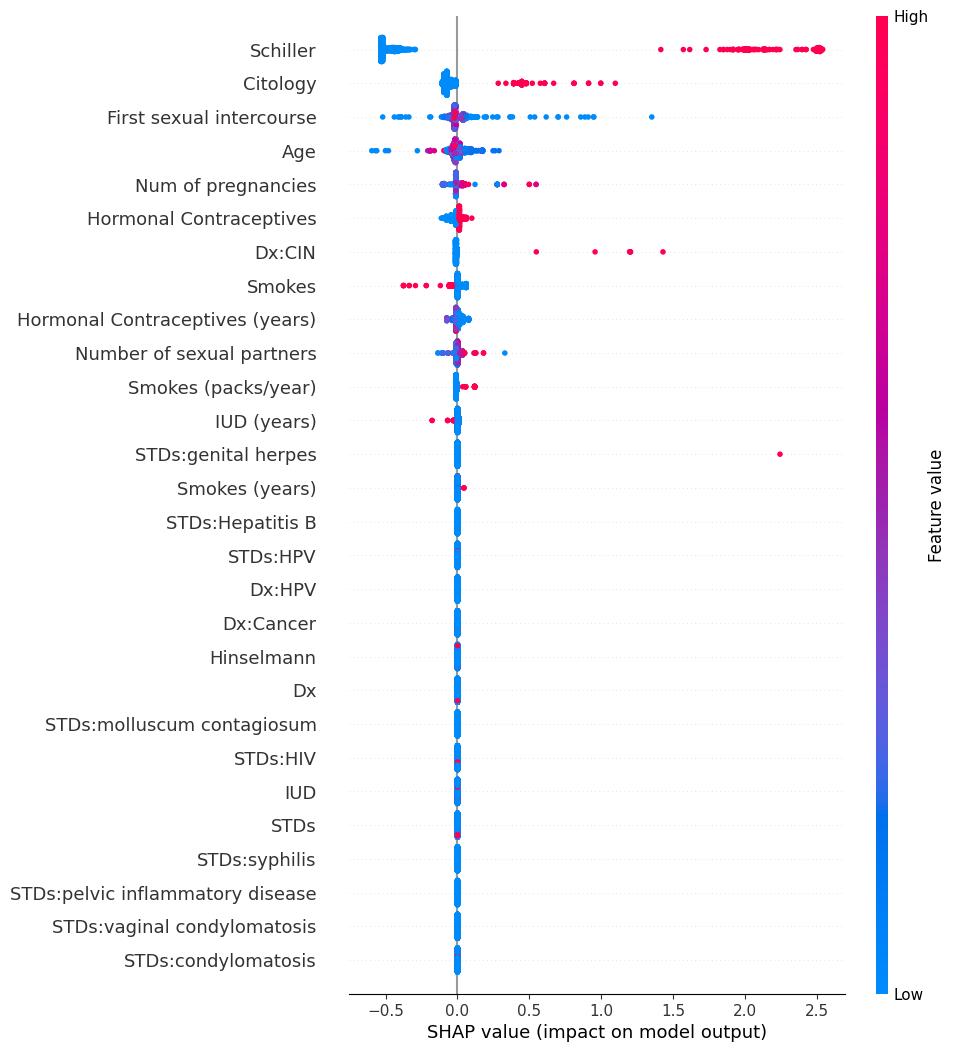

In [9]:
# Plot SHAP values for all features
shap.plots.beeswarm(shap_values, max_display=len(X_resampled_scaled_df.columns))

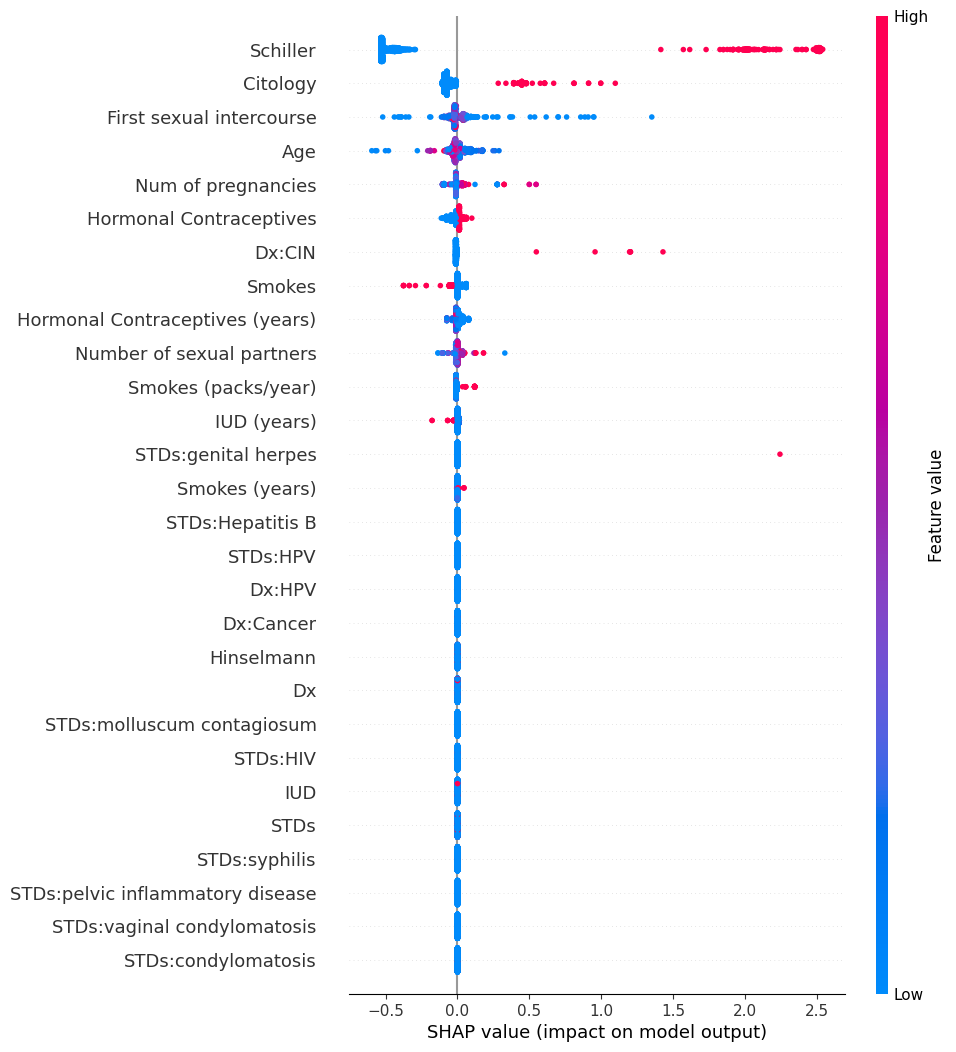

In [13]:
plt.figure()  # Create a new figure
shap.plots.beeswarm(shap_values, max_display=len(X_resampled_scaled_df.columns))
plt.savefig("shap_beeswarm_plot_resampled.png", dpi=300, bbox_inches="tight")  # Save as temperary PNG under sample_data folder as
plt.close()  # Close the plot to prevent duplicate display

In [14]:
from google.colab import files
files.download('shap_beeswarm_plot_resampled.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

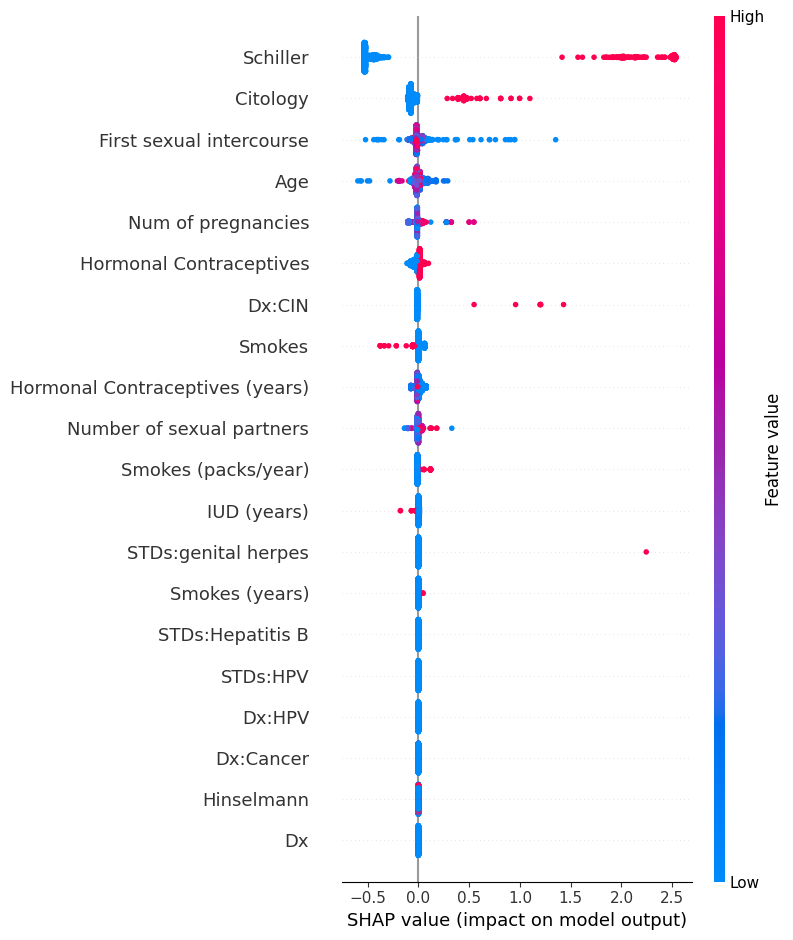

In [22]:
# Summary plot to see the most influential features (top 20)
shap.summary_plot(shap_values, X_resampled_scaled_df)

Schiller's iodine test and cytology have highest importance. Having positive result for these two would increase risk of cervical cancer prediction (red dots far right). First sexual intercourse age lower would increase prediction (blue dots far right).

In [14]:
type(shap_values.values)

numpy.ndarray

In [12]:
# shap_values.values is a m x n NumPy array where m is the number of observations (or samples) in your dataset and n is the number of features you used in your model.
# Each element shap_values.values[i, j] represents the contribution of the j-th feature to the prediction for the i-th observation.
print(shap_values.values)

[[-1.84812788e-02  2.18051821e-04 -2.00212829e-02 ...  0.00000000e+00
  -5.25924072e-01 -9.37648612e-02]
 [-6.62286370e-02 -1.12670460e-02 -1.74365617e-02 ...  0.00000000e+00
  -4.42659412e-01 -8.47548778e-02]
 [-7.72207440e-02 -1.60342332e-02 -2.17124303e-02 ...  0.00000000e+00
  -4.21000042e-01 -8.47548778e-02]
 ...
 [ 1.53618953e-02  1.22233892e-03  2.48802233e-02 ...  0.00000000e+00
   2.51400982e+00 -1.44359692e-02]
 [ 2.74897816e-02  3.55678609e-02  5.78363814e-02 ...  0.00000000e+00
   2.03190757e+00  4.47494766e-01]
 [ 1.53618953e-02  1.22233892e-03  2.48802233e-02 ...  0.00000000e+00
   2.51400982e+00 -1.44359692e-02]]


In [24]:
# Get mean absolute SHAP values for each feature
mean_abs_shap = np.abs(shap_values.values).mean(axis=0)  # mean value across all rows for each feature
shap_importance = pd.Series(mean_abs_shap, index=X_resampled_scaled_df.columns)

In [18]:
print(shap_importance)

Age                                 0.042008
Number of sexual partners           0.012448
First sexual intercourse            0.052692
Num of pregnancies                  0.029822
Smokes                              0.018624
Smokes (years)                      0.000648
Smokes (packs/year)                 0.011679
Hormonal Contraceptives             0.023544
Hormonal Contraceptives (years)     0.014891
IUD                                 0.000000
IUD (years)                         0.003418
STDs                                0.000000
STDs:condylomatosis                 0.000000
STDs:vaginal condylomatosis         0.000000
STDs:syphilis                       0.000000
STDs:pelvic inflammatory disease    0.000000
STDs:genital herpes                 0.002798
STDs:molluscum contagiosum          0.000000
STDs:HIV                            0.000000
STDs:Hepatitis B                    0.000000
STDs:HPV                            0.000000
Dx:Cancer                           0.000000
Dx:CIN    

In [23]:
# Sort in ascending order to find least important
shap_importance_sorted = shap_importance.sort_values()

In [24]:
# Select 5 least important features to drop
least_important = shap_importance_sorted.head(5).index.tolist()
print(least_important)

['STDs:condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:pelvic inflammatory disease', 'STDs:syphilis', 'STDs']


In [25]:
# Remove features with very low impact
low_impact_features = shap_importance[shap_importance < 0.001].index.tolist()

In [26]:
X_rsdf_reduced = X_resampled_scaled_df.drop(columns=low_impact_features)
X_tsd_reduced = X_test_scaled_df.drop(columns=low_impact_features)

In [28]:
X_rsdf_reduced.to_pickle('/content/drive/MyDrive/Colab Notebooks/Cervical cancer prediction/X_rsdf_reduced.pkl')
X_tsd_reduced.to_pickle('/content/drive/MyDrive/Colab Notebooks/Cervical cancer prediction/X_tsd_reduced.pkl')

In [31]:
X_resampled_scaled_df.shape

(802, 28)

In [29]:
X_rsdf_reduced.shape  # 15 features dropped

(802, 13)

In [30]:
X_tsd_reduced.shape

(172, 13)

In [16]:
# refit the model on the reduced DataFrame
model_scale.fit(X_rsdf_reduced, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, ...)

In [45]:
# testing data prediction
y_predict=model_scale.predict(X_tsd_reduced)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       161
           1       0.46      1.00      0.63        11

    accuracy                           0.92       172
   macro avg       0.73      0.96      0.79       172
weighted avg       0.97      0.92      0.94       172



In [34]:
# training data prediction
y_train_predict=model_scale.predict(X_rsdf_reduced)
print(classification_report(y_resampled, y_train_predict))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       642
           1       0.82      1.00      0.90       160

    accuracy                           0.96       802
   macro avg       0.91      0.97      0.94       802
weighted avg       0.96      0.96      0.96       802



Same result as before reducing. Low precision on test set means too many false positives and likely overpredicting class 1 after SMOTE. Shifting threshold slightly upward is the fastest, lowest risk to improve precision without retraining.

**Tune classification threshold**

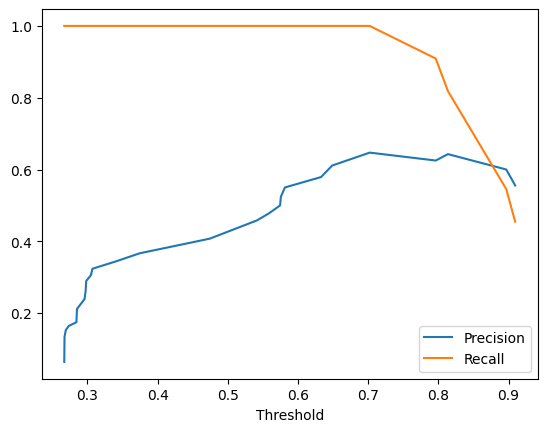

<Figure size 640x480 with 0 Axes>

In [17]:
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities
y_probs = model_scale.predict_proba(X_tsd_reduced)[:, 1]  # Get probabilities for class 1
# Compute precision-recall pairs
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Plot precision-recall tradeoff to choose a better threshold
import matplotlib.pyplot as plt
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.show()

plt.savefig('precision recall threshold.png')

In [20]:
from google.colab import files
files.download('precision recall threshold.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
# Choose an optimal threshold (manually based on the plot or programmatically)
optimal_threshold = thresholds[np.argmax(recalls * precisions)]  # Example: Maximize F1 score

# Print the selected threshold
print(f"Optimal Threshold: {optimal_threshold}")

Optimal Threshold: 0.7022643685340881


Print out precision and recall between threshold of 0.7 and 0.8 to confirm best threshold

In [18]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

y_probs = model_scale.predict_proba(X_tsd_reduced)[:, 1]
thresholds = np.arange(0.70, 0.81, 0.01)
print("Threshold | Precision | Recall")
print("-" * 30)
for thresh in thresholds:
    y_pred_thresh = (y_probs >= thresh).astype(int)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    print(f"{thresh:.2f}      | {precision:.3f}     | {recall:.3f}")

Threshold | Precision | Recall
------------------------------
0.70      | 0.647     | 1.000
0.71      | 0.625     | 0.909
0.72      | 0.625     | 0.909
0.73      | 0.625     | 0.909
0.74      | 0.625     | 0.909
0.75      | 0.625     | 0.909
0.76      | 0.625     | 0.909
0.77      | 0.625     | 0.909
0.78      | 0.625     | 0.909
0.79      | 0.625     | 0.909
0.80      | 0.643     | 0.818
0.81      | 0.643     | 0.818


In [12]:
# Convert probabilities to binary predictions using the chosen threshold
y_pred_adjusted = (y_probs >= optimal_threshold).astype(int)
print(confusion_matrix(y_test, y_pred_adjusted))
print(classification_report(y_test, y_pred_adjusted))

[[155   6]
 [  0  11]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       161
           1       0.65      1.00      0.79        11

    accuracy                           0.97       172
   macro avg       0.82      0.98      0.88       172
weighted avg       0.98      0.97      0.97       172



In [37]:
y_train_probs = model_scale.predict_proba(X_rsdf_reduced)[:, 1]
y_train_pred_adjusted = (y_train_probs >= optimal_threshold).astype(int)

print(confusion_matrix(y_resampled, y_train_pred_adjusted))
print(classification_report(y_resampled, y_train_pred_adjusted))

[[622  20]
 [  0 160]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       642
           1       0.89      1.00      0.94       160

    accuracy                           0.98       802
   macro avg       0.94      0.98      0.96       802
weighted avg       0.98      0.98      0.98       802



Training data has high precision 0.89 and perfect recall 1.0, but testing data has 0.24 point drop to 0.65, indicating not underfitting but slight overfitting. Model with 10 trees and 5 max depth (not complicated) is not the cause of overfitting. Stop here and save this as the best model.

In [21]:
import joblib

# Save the trained model
joblib.dump(model_scale, "/content/drive/My Drive/Colab Notebooks/Cervical cancer prediction/best_xgboost_scale_model.pkl")

['/content/drive/My Drive/Colab Notebooks/Cervical cancer prediction/best_xgboost_scale_model.pkl']

In [22]:
import joblib

# Load the model from the Colab environment's file path
best_model = joblib.load("/content/drive/My Drive/Colab Notebooks/Cervical cancer prediction/best_xgboost_scale_model.pkl")

# Check the loaded model
print(best_model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, ...)


In [26]:
import pickle

# save model, threshold and scale_pos_weight
model_package = {
    "model": model_scale,
    "threshold": 0.70,
    "scale_pos_weight": 803 / 55
}

with open("final_model.pkl", "wb") as f:
    pickle.dump(model_package, f)

In [29]:
with open("final_model.pkl", "rb") as f:
    final_model = pickle.load(f)

# load model, threshold and scale_pos_weight
best_model = final_model["model"]
threshold = final_model["threshold"]
scale_pos_weight = final_model["scale_pos_weight"]

print(best_model)
print(threshold)
print(scale_pos_weight)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, ...)
0.7
14.6


***Tried early stopping, parameter tunning with regularization added, but with worse results. ***
****************************************************************************

Use early stopping to control n_estimator and prevent overfitting

Instead of slicing 80/20 directly to the training dataset, use train_test_split() for proper shuffling and stratification

In [17]:
from sklearn.model_selection import train_test_split

X_train_fit, X_train_eval, y_train_fit, y_train_eval = train_test_split(
    X_rsdf_reduced, y_resampled,
    test_size=0.2,
    stratify=y_resampled,
    random_state=42
)

In [18]:
from xgboost import XGBClassifier

scale_pos_weight = 803 / 55  # Calculate scale_pos_weight
xgb_model = XGBClassifier(n_estimators=500, # large number, let early stopping handle it
                          learning_rate=0.1,
                          max_depth=5,
                          scale_pos_weight=scale_pos_weight,
                          early_stopping_rounds=10,
                          use_label_encoder=False,  # disables the default label encoder
                          eval_metric='logloss', # specify the default for clarity and control
                          random_state=42) # verbosity=1 is default, showing warnings and basic training info

# Fit the model with early stopping
xgb_model.fit(X_train_fit, y_train_fit,
              eval_set=[(X_train_eval, y_train_eval)],
              verbose=True
              )

# Get the best number of trees
best_n_trees = xgb_model.best_iteration
print(f"Best number of trees: {best_n_trees}")

[0]	validation_0-logloss:0.97088
[1]	validation_0-logloss:0.82194
[2]	validation_0-logloss:0.71093
[3]	validation_0-logloss:0.62273
[4]	validation_0-logloss:0.55211
[5]	validation_0-logloss:0.49301
[6]	validation_0-logloss:0.44420
[7]	validation_0-logloss:0.40195
[8]	validation_0-logloss:0.36631
[9]	validation_0-logloss:0.33421
[10]	validation_0-logloss:0.30574
[11]	validation_0-logloss:0.27901
[12]	validation_0-logloss:0.25993
[13]	validation_0-logloss:0.24069
[14]	validation_0-logloss:0.22459
[15]	validation_0-logloss:0.20765
[16]	validation_0-logloss:0.19273
[17]	validation_0-logloss:0.18024
[18]	validation_0-logloss:0.16850
[19]	validation_0-logloss:0.16001
[20]	validation_0-logloss:0.15140
[21]	validation_0-logloss:0.14372
[22]	validation_0-logloss:0.13752
[23]	validation_0-logloss:0.13134
[24]	validation_0-logloss:0.12631
[25]	validation_0-logloss:0.12229
[26]	validation_0-logloss:0.11755
[27]	validation_0-logloss:0.11309
[28]	validation_0-logloss:0.11014
[29]	validation_0-loglos

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [15:27:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[46]	validation_0-logloss:0.08482
[47]	validation_0-logloss:0.08527
[48]	validation_0-logloss:0.08511
[49]	validation_0-logloss:0.08460
[50]	validation_0-logloss:0.08443
[51]	validation_0-logloss:0.08440
[52]	validation_0-logloss:0.08428
[53]	validation_0-logloss:0.08423
[54]	validation_0-logloss:0.08436
[55]	validation_0-logloss:0.08424
[56]	validation_0-logloss:0.08479
[57]	validation_0-logloss:0.08420
[58]	validation_0-logloss:0.08451
[59]	validation_0-logloss:0.08470
[60]	validation_0-logloss:0.08464
[61]	validation_0-logloss:0.08417
[62]	validation_0-logloss:0.08414
[63]	validation_0-logloss:0.08392
[64]	validation_0-logloss:0.08443
[65]	validation_0-logloss:0.08405
[66]	validation_0-logloss:0.08402
[67]	validation_0-logloss:0.08463
[68]	validation_0-logloss:0.08463
[69]	validation_0-logloss:0.08490
[70]	validation_0-logloss:0.08470
[71]	validation_0-logloss:0.08447
[72]	validation_0-logloss:0.08463
[73]	validation_0-logloss:0.08473
Best number of trees: 63


In [14]:
optimal_threshold=0.7022643685340881

In [21]:
# Get predicted probabilities
y_probs = xgb_model.predict_proba(X_tsd_reduced)[:, 1]  # Predictions automatically use the best iteration
# Convert probabilities to binary predictions using the chosen threshold
y_pred_adjusted = (y_probs >= optimal_threshold).astype(int)

print(confusion_matrix(y_test, y_pred_adjusted))
print(classification_report(y_test, y_pred_adjusted))

[[155   6]
 [  2   9]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       161
           1       0.60      0.82      0.69        11

    accuracy                           0.95       172
   macro avg       0.79      0.89      0.83       172
weighted avg       0.96      0.95      0.96       172



In [22]:
# For predictions, optionally specify ntree_limit:
xgb_pred = xgb_model.predict_proba(X_tsd_reduced, iteration_range=(0, best_n_trees))[:, 1]
xgb_pred_adjusted = (xgb_pred >= optimal_threshold).astype(int)
print(confusion_matrix(y_test, xgb_pred_adjusted))
print(classification_report(y_test, xgb_pred_adjusted))

[[155   6]
 [  2   9]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       161
           1       0.60      0.82      0.69        11

    accuracy                           0.95       172
   macro avg       0.79      0.89      0.83       172
weighted avg       0.96      0.95      0.96       172



In [23]:
# training evaluation
y_train_probs = xgb_model.predict_proba(X_rsdf_reduced)[:, 1]  # Predictions automatically use the best iteration
# Convert probabilities to binary predictions using the chosen threshold
y_train_adjusted = (y_train_probs >= optimal_threshold).astype(int)

print(confusion_matrix(y_resampled, y_train_adjusted))
print(classification_report(y_resampled, y_train_adjusted))

[[636   6]
 [  1 159]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       642
           1       0.96      0.99      0.98       160

    accuracy                           0.99       802
   macro avg       0.98      0.99      0.99       802
weighted avg       0.99      0.99      0.99       802



Precision of 0.6 and recall of 0.82 are worse than before early stopping, optimal number of trees (63) more than previous model (10), so overfitting was not caused by too many trees. Go back to tune parameters in previous model.

Tune regularization parameters

In [7]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [8]:
param_grid = {
    'reg_alpha': [0, 0.1, 0.5, 1],  # L1 regularization term, default 0 (no L1), adds penalty for N of non-zero leaf weights, remove irrelevant features
    'reg_lambda': [1, 5, 10],       # L2 regularization term, default 1 (balanced regularization), adds penalty for large leaf weights to get smooth model, keep all features
    'min_child_weight': [1, 3, 5],  # Minimum number of training examples required to make a split, default 1, 5-10 conservative, >10 very restrictive
    'subsample': [0.6, 0.8, 1.0],   # Fraction of training data randomly sampled to grow each tree, default 1 (use all training data)
    'colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features randomly selected for each tree, default 1 (use all features)
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
}

In [9]:
scale_pos_weight = 803 / 55  # Calculate scale_pos_weight

In [22]:
grid_model = XGBClassifier(
    learning_rate=0.1,
    n_estimators=20,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [23]:
random_search = RandomizedSearchCV(
    estimator=grid_model,
    param_distributions=param_grid,
    scoring='f1',  # balancing precision and recall
    n_iter=20,             # try 20 combinations
    cv=3,                  # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1              # use all cores
)

random_search.fit(X_rsdf_reduced, y_resampled)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           monotone_constraints=None,
                                           multi_strategy=None, n_estimators=20,
                                           n_jobs=None, num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'max_depth': [3, 5, 7],
                                        'min_child_weight': [1, 3, 5],
                                        'reg_alpha': [0, 0.1, 0.5, 1],
                                        'reg_lambda': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='f1', verbose=1)

In [24]:
print("Best parameters:", random_search.best_params_)
print("Best score (CV):", random_search.best_score_)

Best parameters: {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0, 'min_child_weight': 5, 'max_depth': 3, 'colsample_bytree': 1.0}
Best score (CV): 0.9163268018531175


In [25]:
best_model = random_search.best_estimator_

# testing data evaluation
y_probs = best_model.predict_proba(X_tsd_reduced)[:, 1]
y_pred_thresh = (y_probs > optimal_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh, digits=3))

[[155   6]
 [  1  10]]
              precision    recall  f1-score   support

           0      0.994     0.963     0.978       161
           1      0.625     0.909     0.741        11

    accuracy                          0.959       172
   macro avg      0.809     0.936     0.859       172
weighted avg      0.970     0.959     0.963       172



Precision dropped to 0.625 compared to 0.65 from model_scale, recall dropped to 0.909 from 1.0.

In [26]:
# training data evaluation
y_train_probs = best_model.predict_proba(X_rsdf_reduced)[:, 1]
y_train_pred = (y_train_probs > optimal_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_resampled, y_train_pred))
print(classification_report(y_resampled, y_train_pred, digits=3))

[[622  20]
 [  6 154]]
              precision    recall  f1-score   support

           0      0.990     0.969     0.980       642
           1      0.885     0.963     0.922       160

    accuracy                          0.968       802
   macro avg      0.938     0.966     0.951       802
weighted avg      0.969     0.968     0.968       802



The best parameters resulted in a underfit model with very shallow trees (max_depth=3) and split only when many samples are in a node (min_child_weight=5), light L2 regularization (reg_lambda=1) and no L1 regularization (reg_alpha=0). These settings lead to a conservative model-likely too simple, hence underfitting.

Keep the model_scale model and add light regularization

In [23]:
scale_pos_weight = 803 / 55  # Calculate scale_pos_weight
model_scale_new = xgb.XGBClassifier(learning_rate=0.1,
                                 max_depth=5,
                                 n_estimators=10, # increase would cause worse precision and recall
                                 scale_pos_weight=scale_pos_weight,
                                 reg_alpha=0.5,
                                 random_state=42)
model_scale_new.fit(X_rsdf_reduced, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, ...)

In [24]:
optimal_threshold=0.7022643685340881

# testing data evaluation
y_probs = model_scale_new.predict_proba(X_tsd_reduced)[:, 1]
y_pred_thresh = (y_probs > optimal_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh, digits=3))

[[155   6]
 [  1  10]]
              precision    recall  f1-score   support

           0      0.994     0.963     0.978       161
           1      0.625     0.909     0.741        11

    accuracy                          0.959       172
   macro avg      0.809     0.936     0.859       172
weighted avg      0.970     0.959     0.963       172



In [25]:
# training data evaluation
y_train_probs = model_scale_new.predict_proba(X_rsdf_reduced)[:, 1]
y_train_pred = (y_train_probs > optimal_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_resampled, y_train_pred))
print(classification_report(y_resampled, y_train_pred, digits=3))

[[622  20]
 [  0 160]]
              precision    recall  f1-score   support

           0      1.000     0.969     0.984       642
           1      0.889     1.000     0.941       160

    accuracy                          0.975       802
   macro avg      0.944     0.984     0.963       802
weighted avg      0.978     0.975     0.976       802

